In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
plt.style.use('fivethirtyeight') 

In [2]:
cardata = pd.read_csv(r'cleaned_data.csv')
cardata.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [3]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5874 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 596.7+ KB


As we can see from the data information, we can see that after cleaning the data of the those that have "null bhp" value for power column as well as empty value for Engine column, we have a total of 5874 dataset with 823 of them having a value for "New_price" column. 

# Numerical Data

We first look at the numerical data

In [25]:
# Putting all the numerical variable into a variable numericaldata
numericaldata = cardata[["Year","Kilometers_Driven","Mileage","Engine","Power","Seats","Price"]]

Our variables range from the year the car was produced, the kilometers driven on the car, the mileage (fuel efficiency of the car), the engine capacity, the power of the engine, the number of seats in the car, to the price of the car. We have left out the new price of the car as there are too many rows without a value. These factors may all affect the price of the car, and thus, we shall now look at the distribution of the following numerical variables.

In [26]:
numericaldata.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5874.000000,5.874000e+03,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000
mean,2013.476507,5.832412e+04,18.273829,1625.701226,113.272203,5.283623,9.601551
std,3.166025,9.215466e+04,4.371965,601.544134,53.873317,0.804961,11.248283
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.343125e+04,15.260000,1198.000000,75.000000,5.000000,3.512500
50%,2014.000000,5.262150e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240825e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


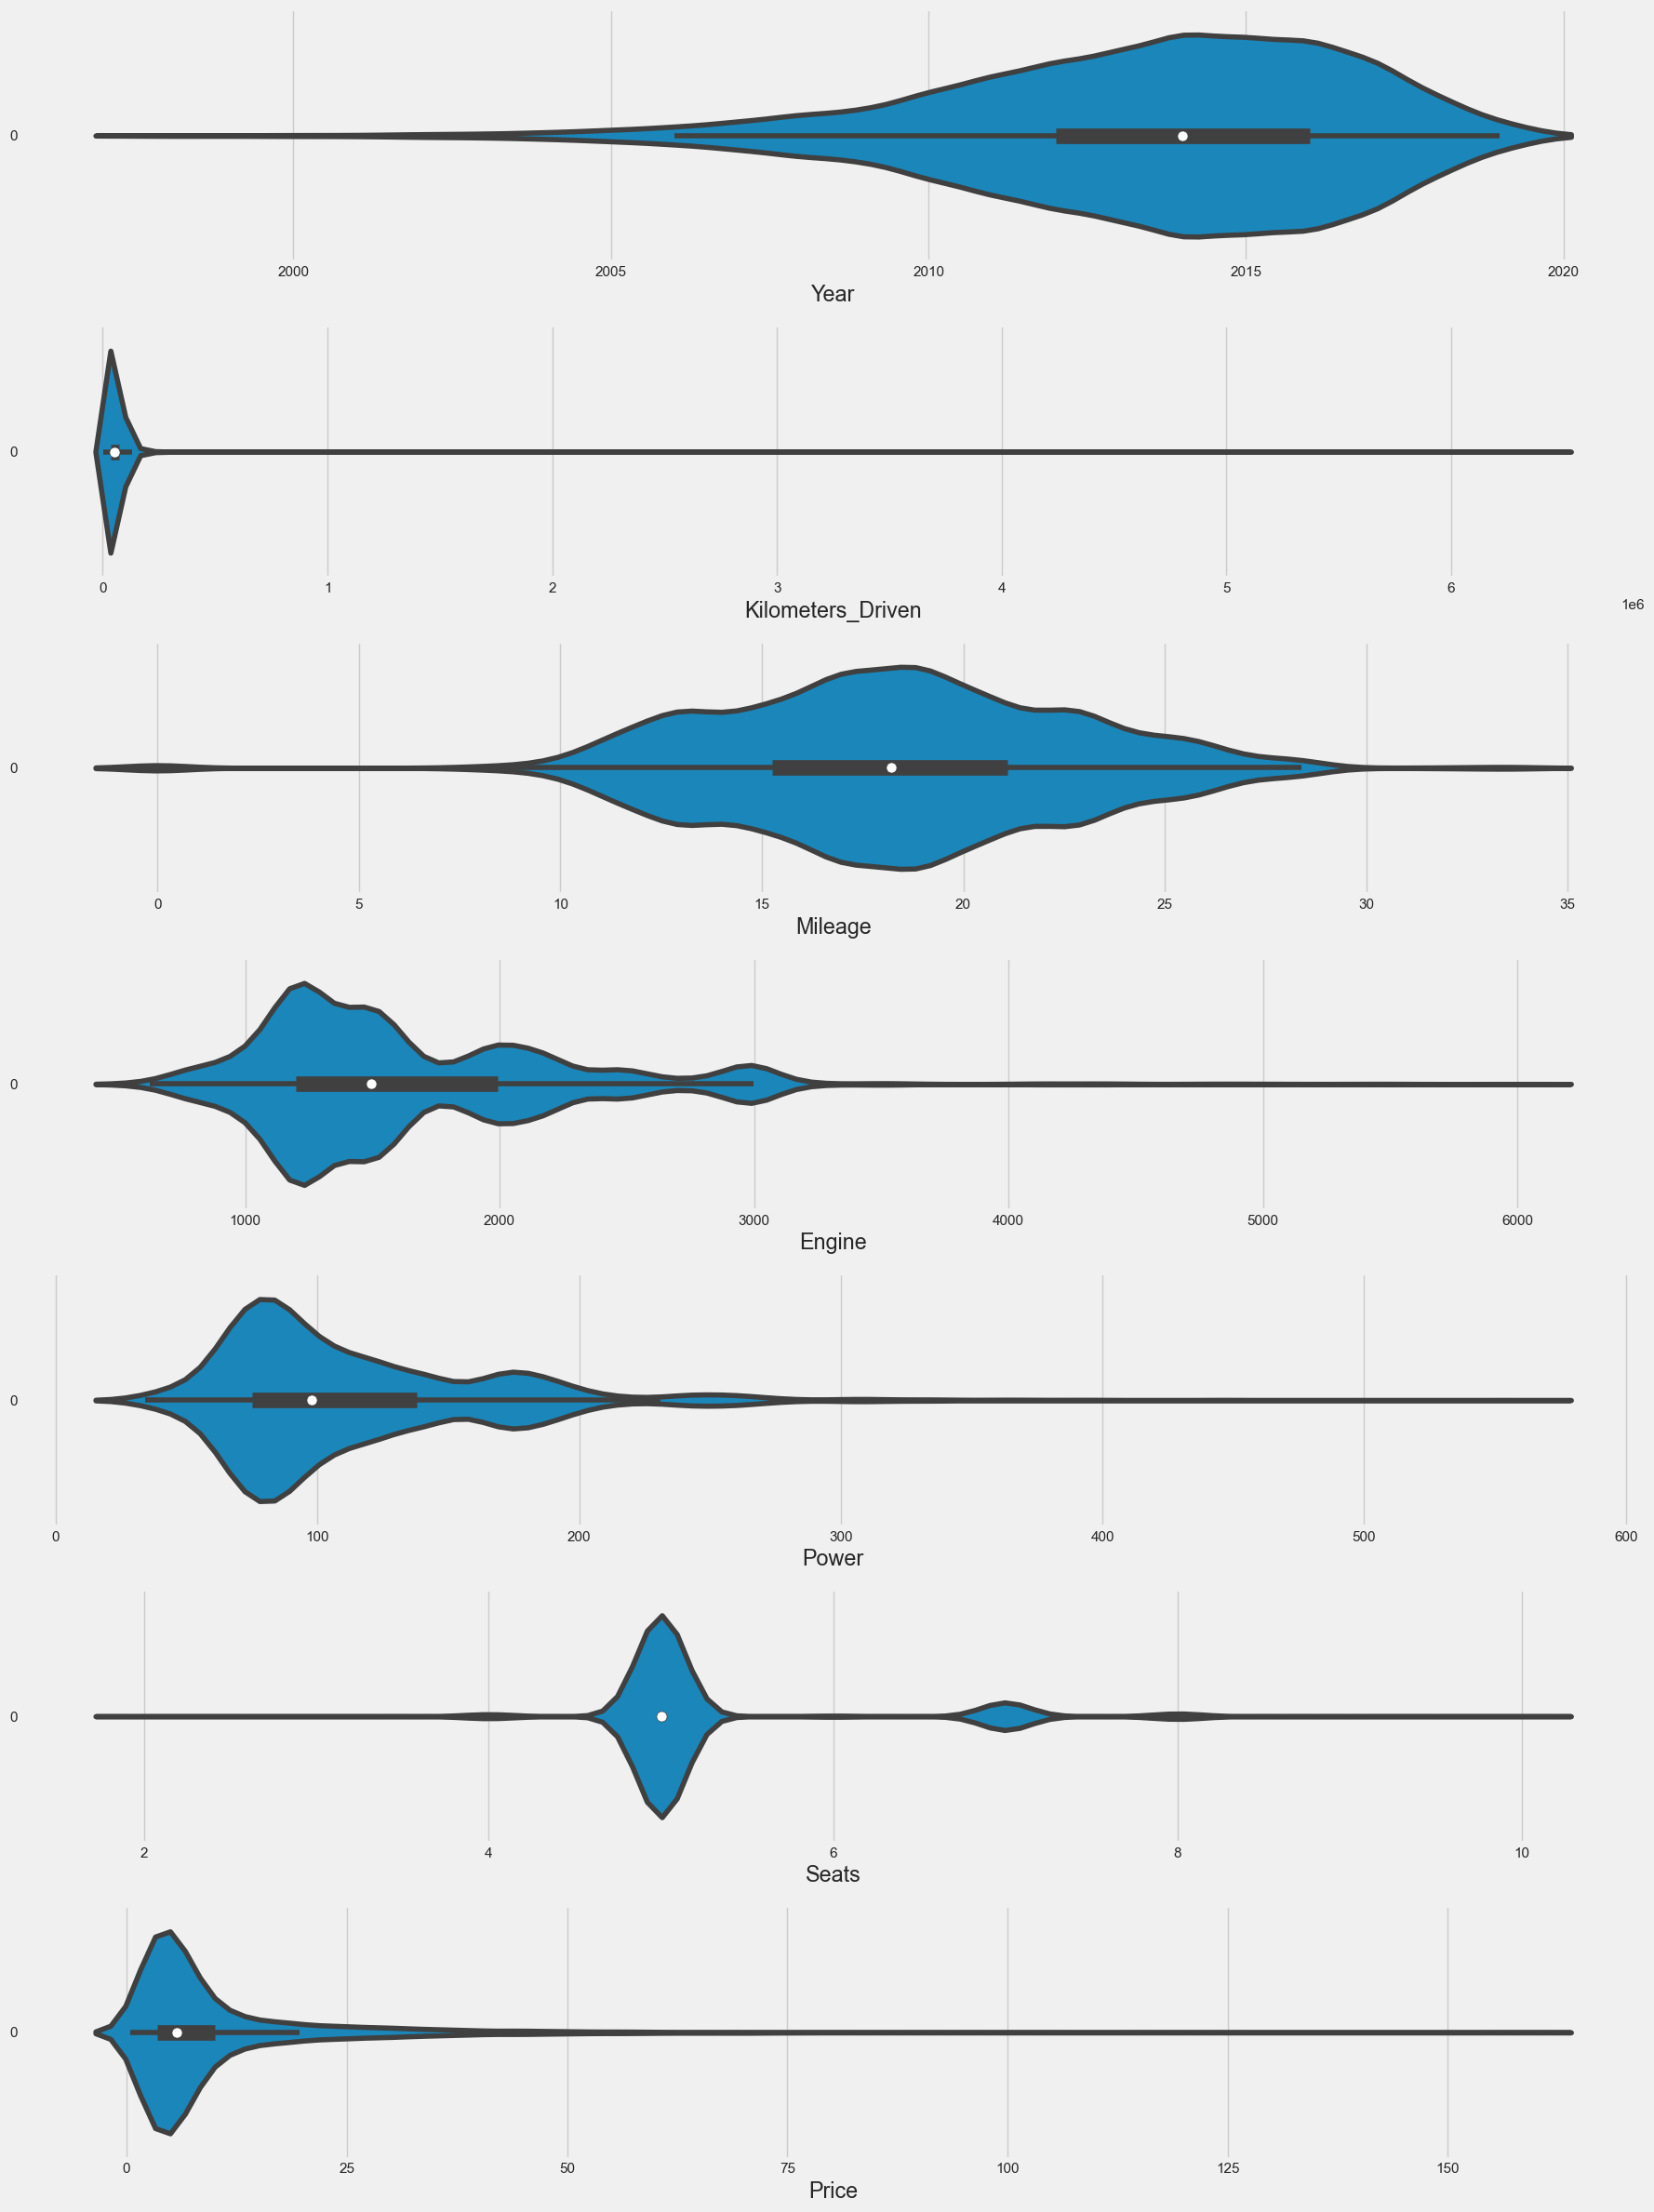

In [27]:
f, axes = plt.subplots(7, figsize=(18, 24))

# Draw violin plots
for count, var in enumerate(numericaldata):
    sb.violinplot(data=numericaldata[var], orient="h", ax=axes[count])
    axes[count].set_xlabel(var)
    
# Adjust layout
plt.tight_layout()
plt.show()

As we can see from the graphs, we have quite a mix. The first graph for "Years" is skewed to the right, whereas the third and sixth graphs, Mileage and Seats, are relatively centered. The graphs for Kilometers Driven, Engine, Power, and Price are mostly skewed to the left.

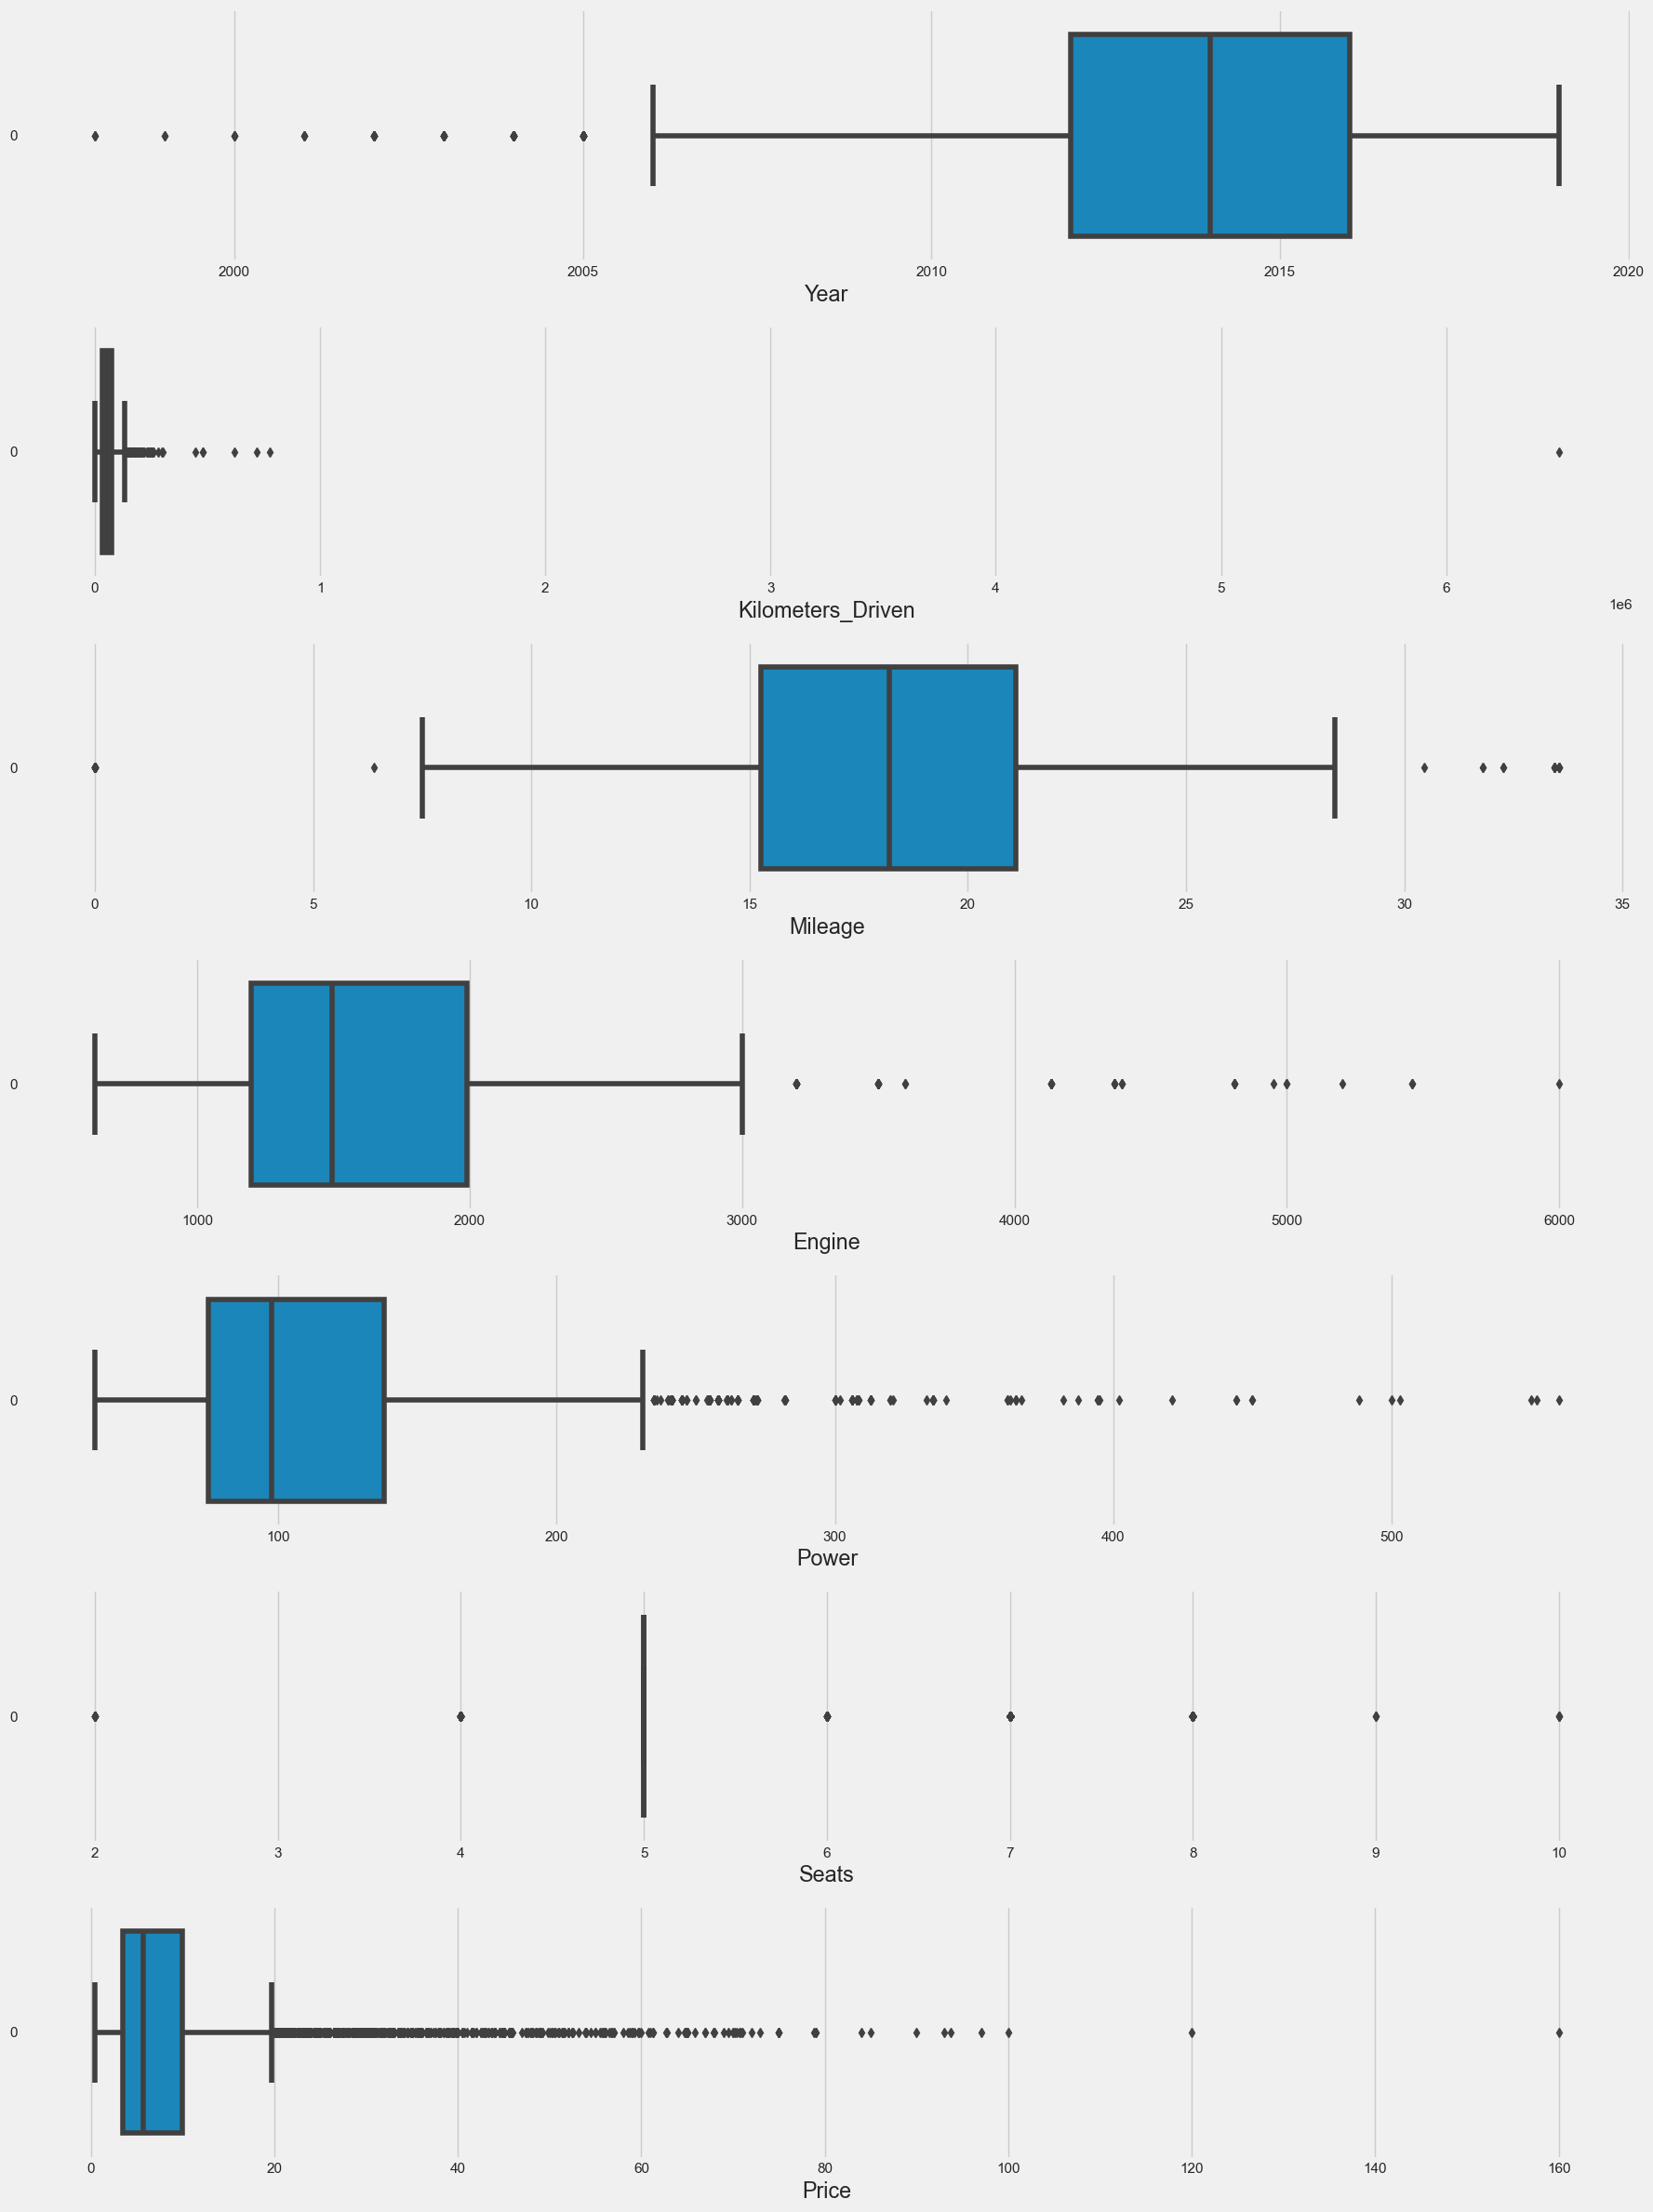

In [28]:
# Draw box plots
f, axes = plt.subplots(7, figsize=(18, 24))

for count, var in enumerate(numericaldata):
    sb.boxplot(data=numericaldata[var], orient="h", ax=axes[count])
    axes[count].set_xlabel(var)
    
# Adjust layout
plt.tight_layout()
plt.show()

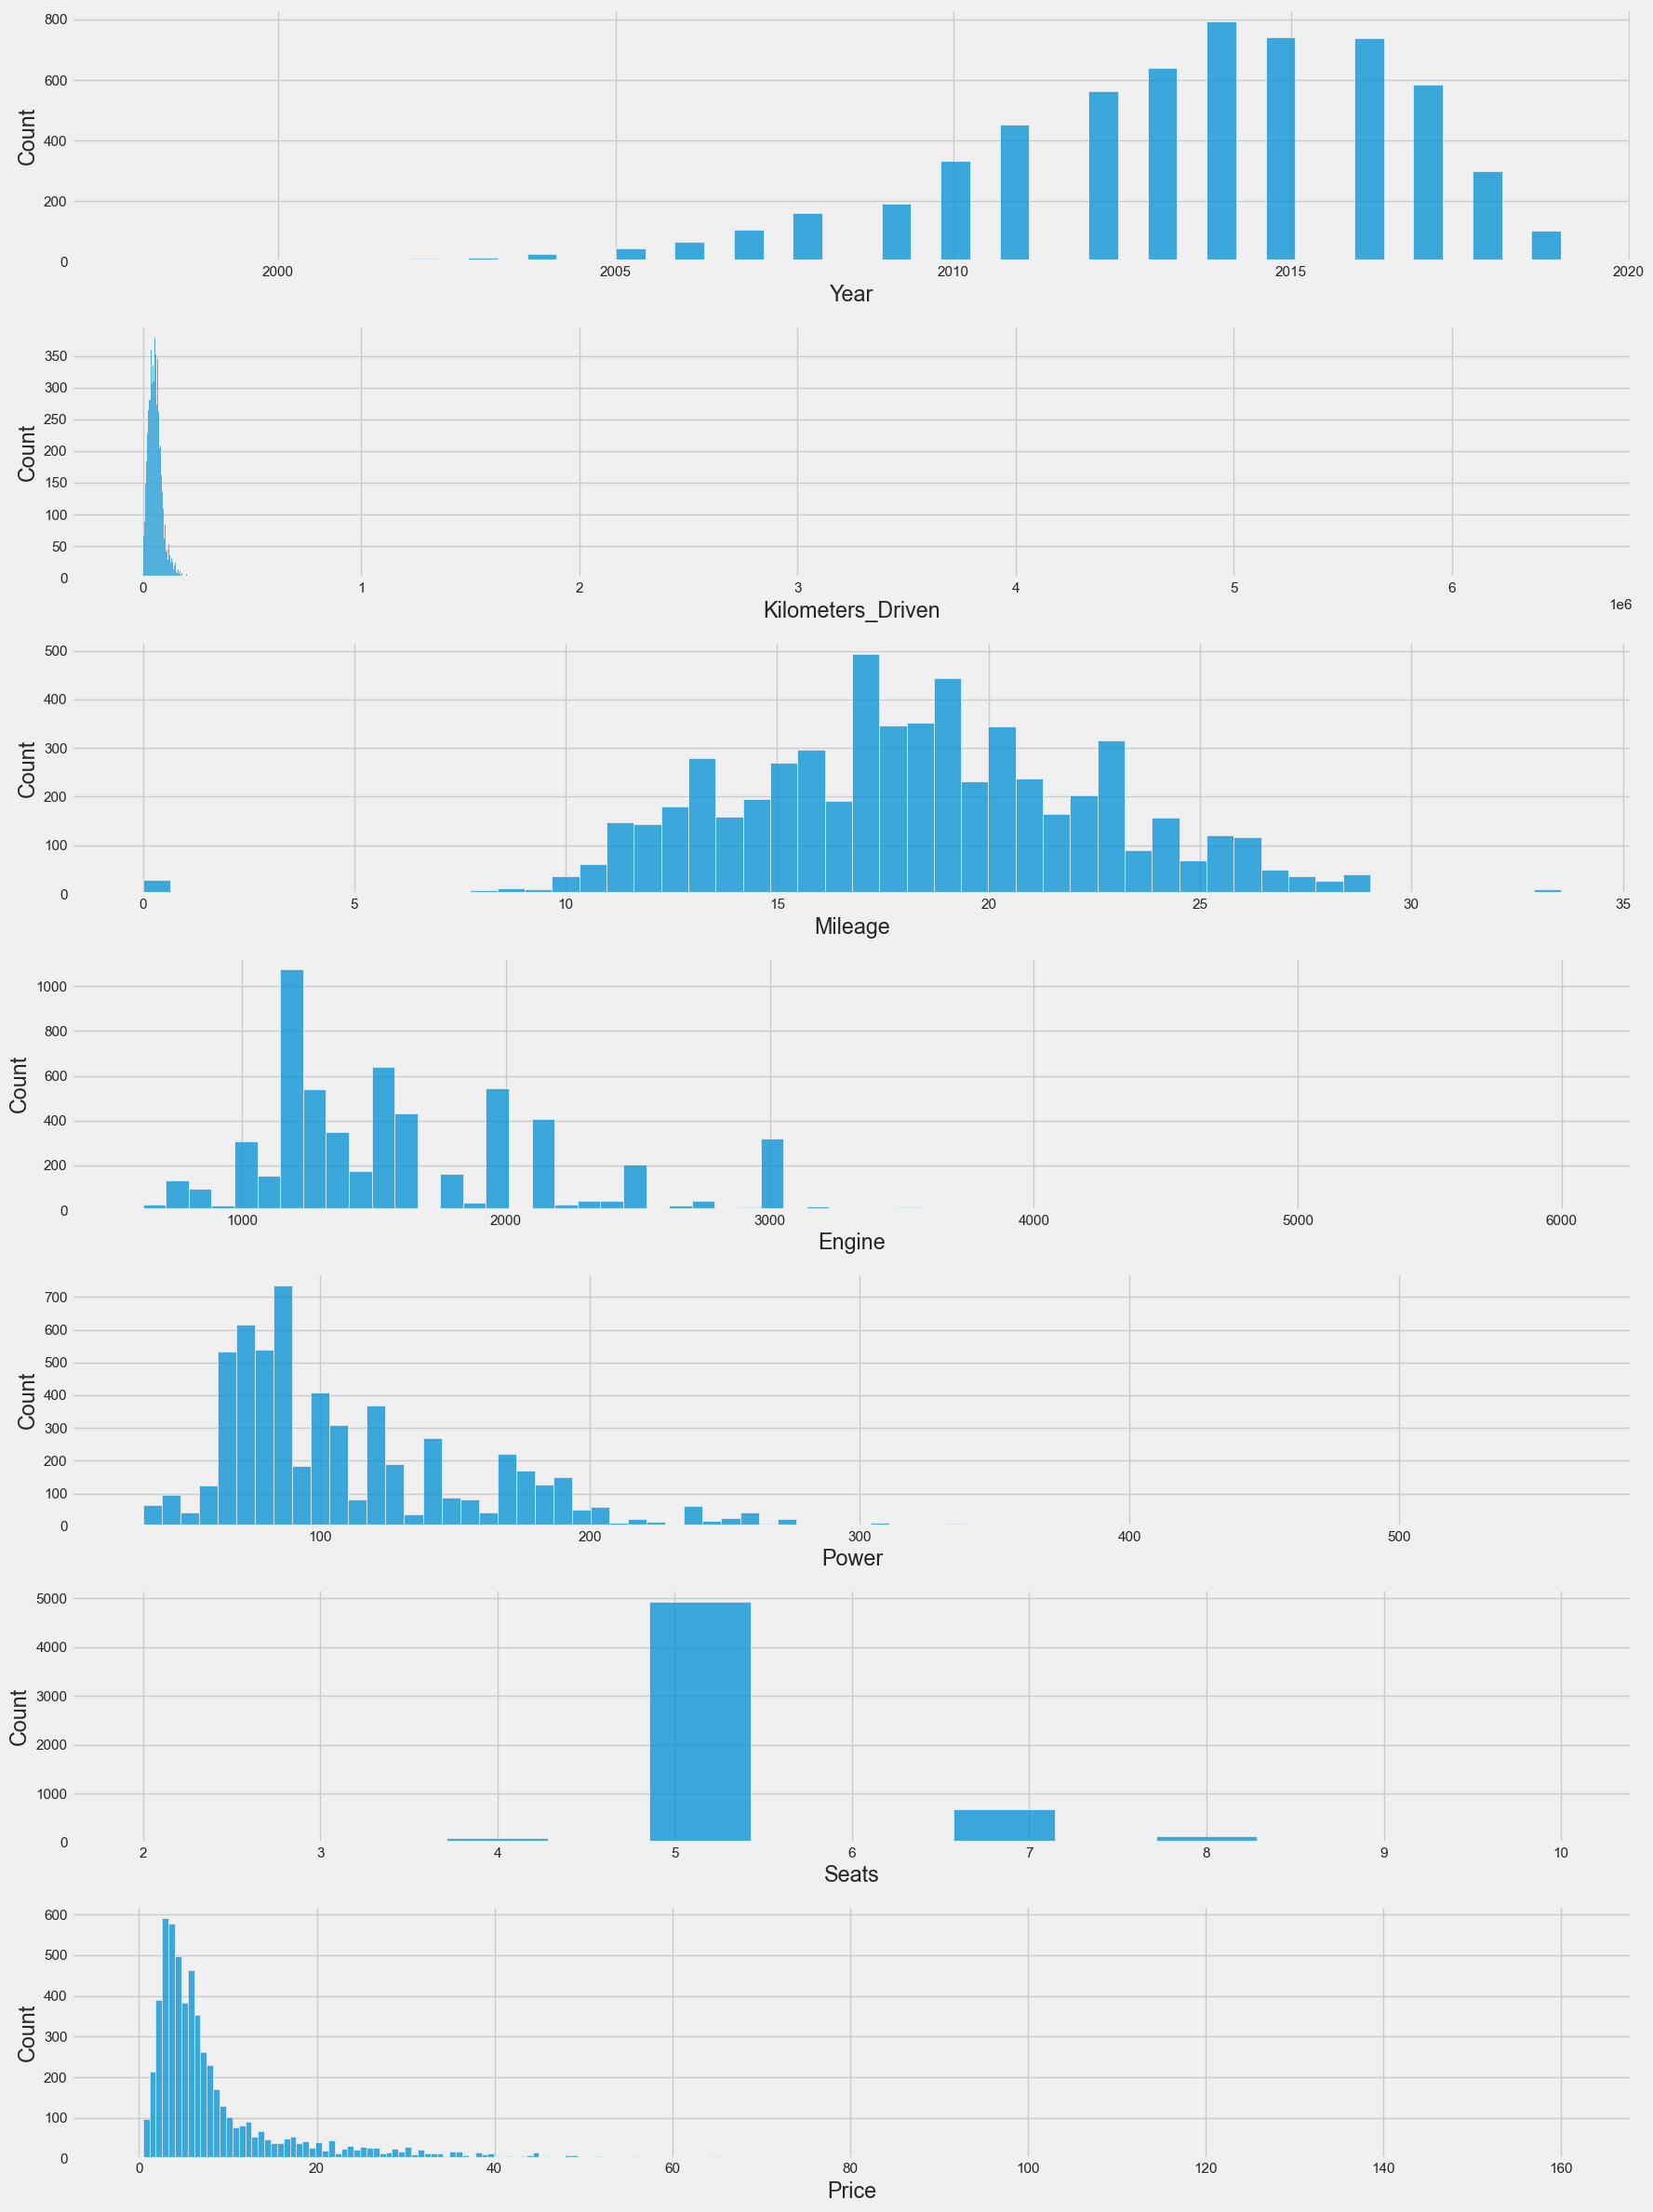

In [29]:
# Draw histogram plots
f, axes = plt.subplots(7, figsize=(18, 24))

for count, var in enumerate(numericaldata):
    sb.histplot(data=numericaldata[var], ax=axes[count])
    axes[count].set_xlabel(var)

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
numericaldata["Price"].describe()

count    5874.000000
mean        9.601551
std        11.248283
min         0.440000
25%         3.512500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

<Axes: >

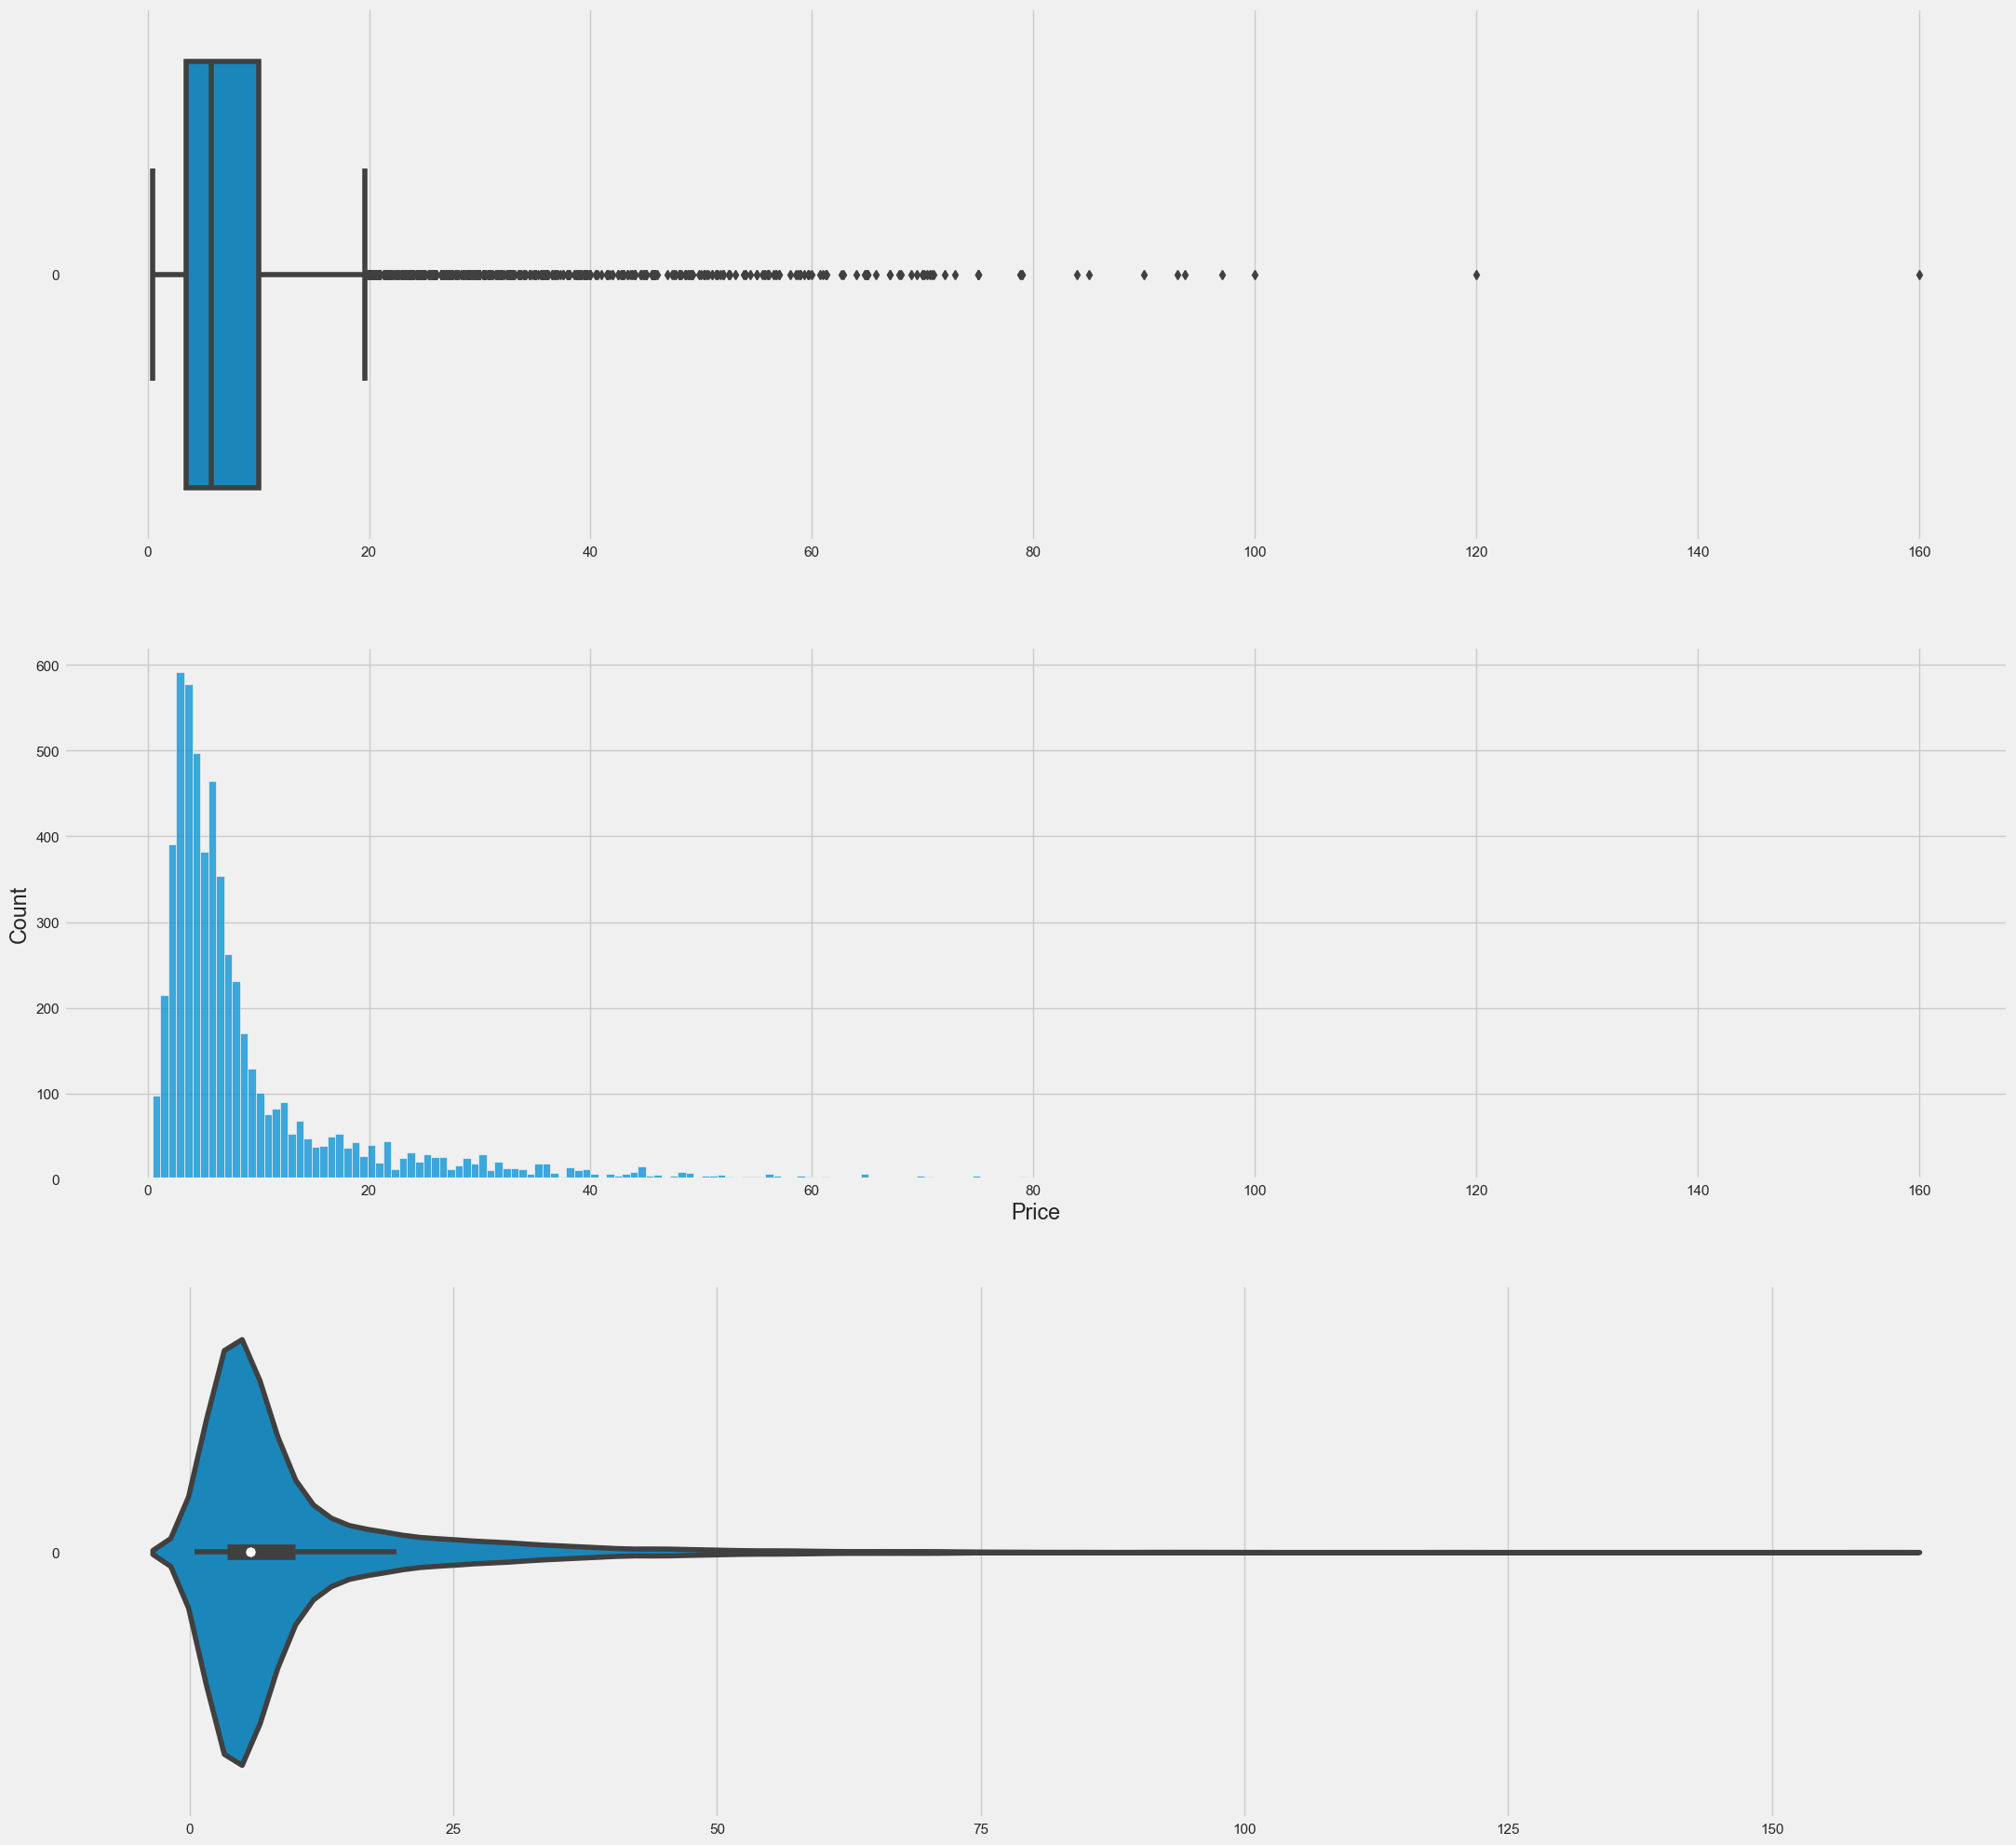

In [31]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = numericaldata["Price"], orient = "h", ax = axes[0])
sb.histplot(data = numericaldata["Price"],ax = axes[1])
sb.violinplot(data = numericaldata["Price"], orient = "h", ax = axes[2])

In [32]:
numericaldata.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.169396,0.285191,-0.067918,0.014612,0.007960,0.299543
Kilometers_Driven,-0.169396,1.000000,-0.060669,0.093012,0.033470,0.083043,-0.008298
Mileage,0.285191,-0.060669,1.000000,-0.636028,-0.537729,-0.330711,-0.340554
Engine,-0.067918,0.093012,-0.636028,1.000000,0.866303,0.401130,0.658044
Power,0.014612,0.033470,-0.537729,0.866303,1.000000,0.101487,0.772837
Seats,0.007960,0.083043,-0.330711,0.401130,0.101487,1.000000,0.055616
Price,0.299543,-0.008298,-0.340554,0.658044,0.772837,0.055616,1.000000


<Axes: >

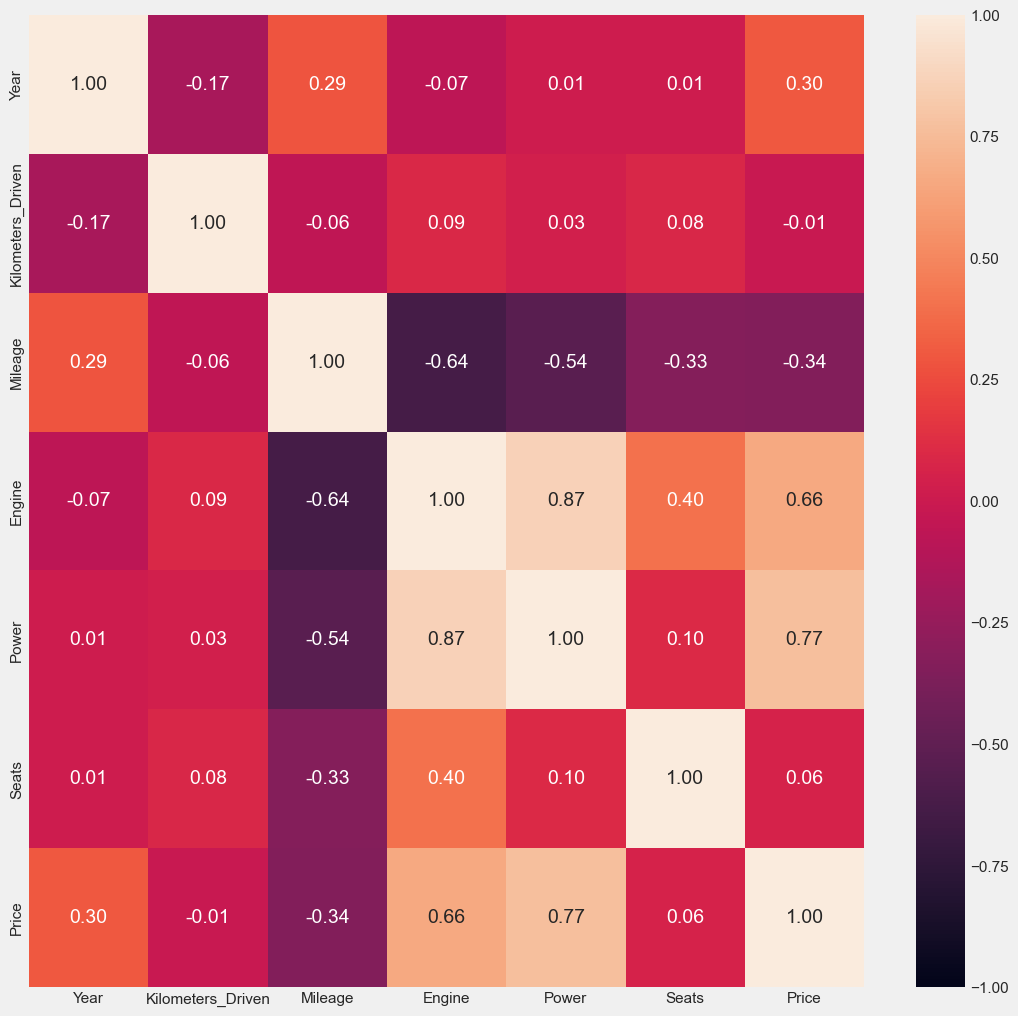

In [33]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12,12))
sb.heatmap(numericaldata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Judging from the heatmap, the correlation between Price and the other variables varies. The relationship between Price and Kilometers Driven, as well as Seats, is extremely low, at -0.01 and 0.06 respectively. It has a low correlation with Year and Mileage, with correlations at 0.3 and -0.34 respectively. However, it exhibits a relatively high correlation with Engine and Power, at 0.66 and 0.77 respectively. This indicates that Engine and Power have a strong linear correlation with Price, suggesting that both linear and non-linear models could be explored for our prediction.

C:\Users\Haoren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Haoren\AppData\Local\Temp\ipykernel_12048\1355668119.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


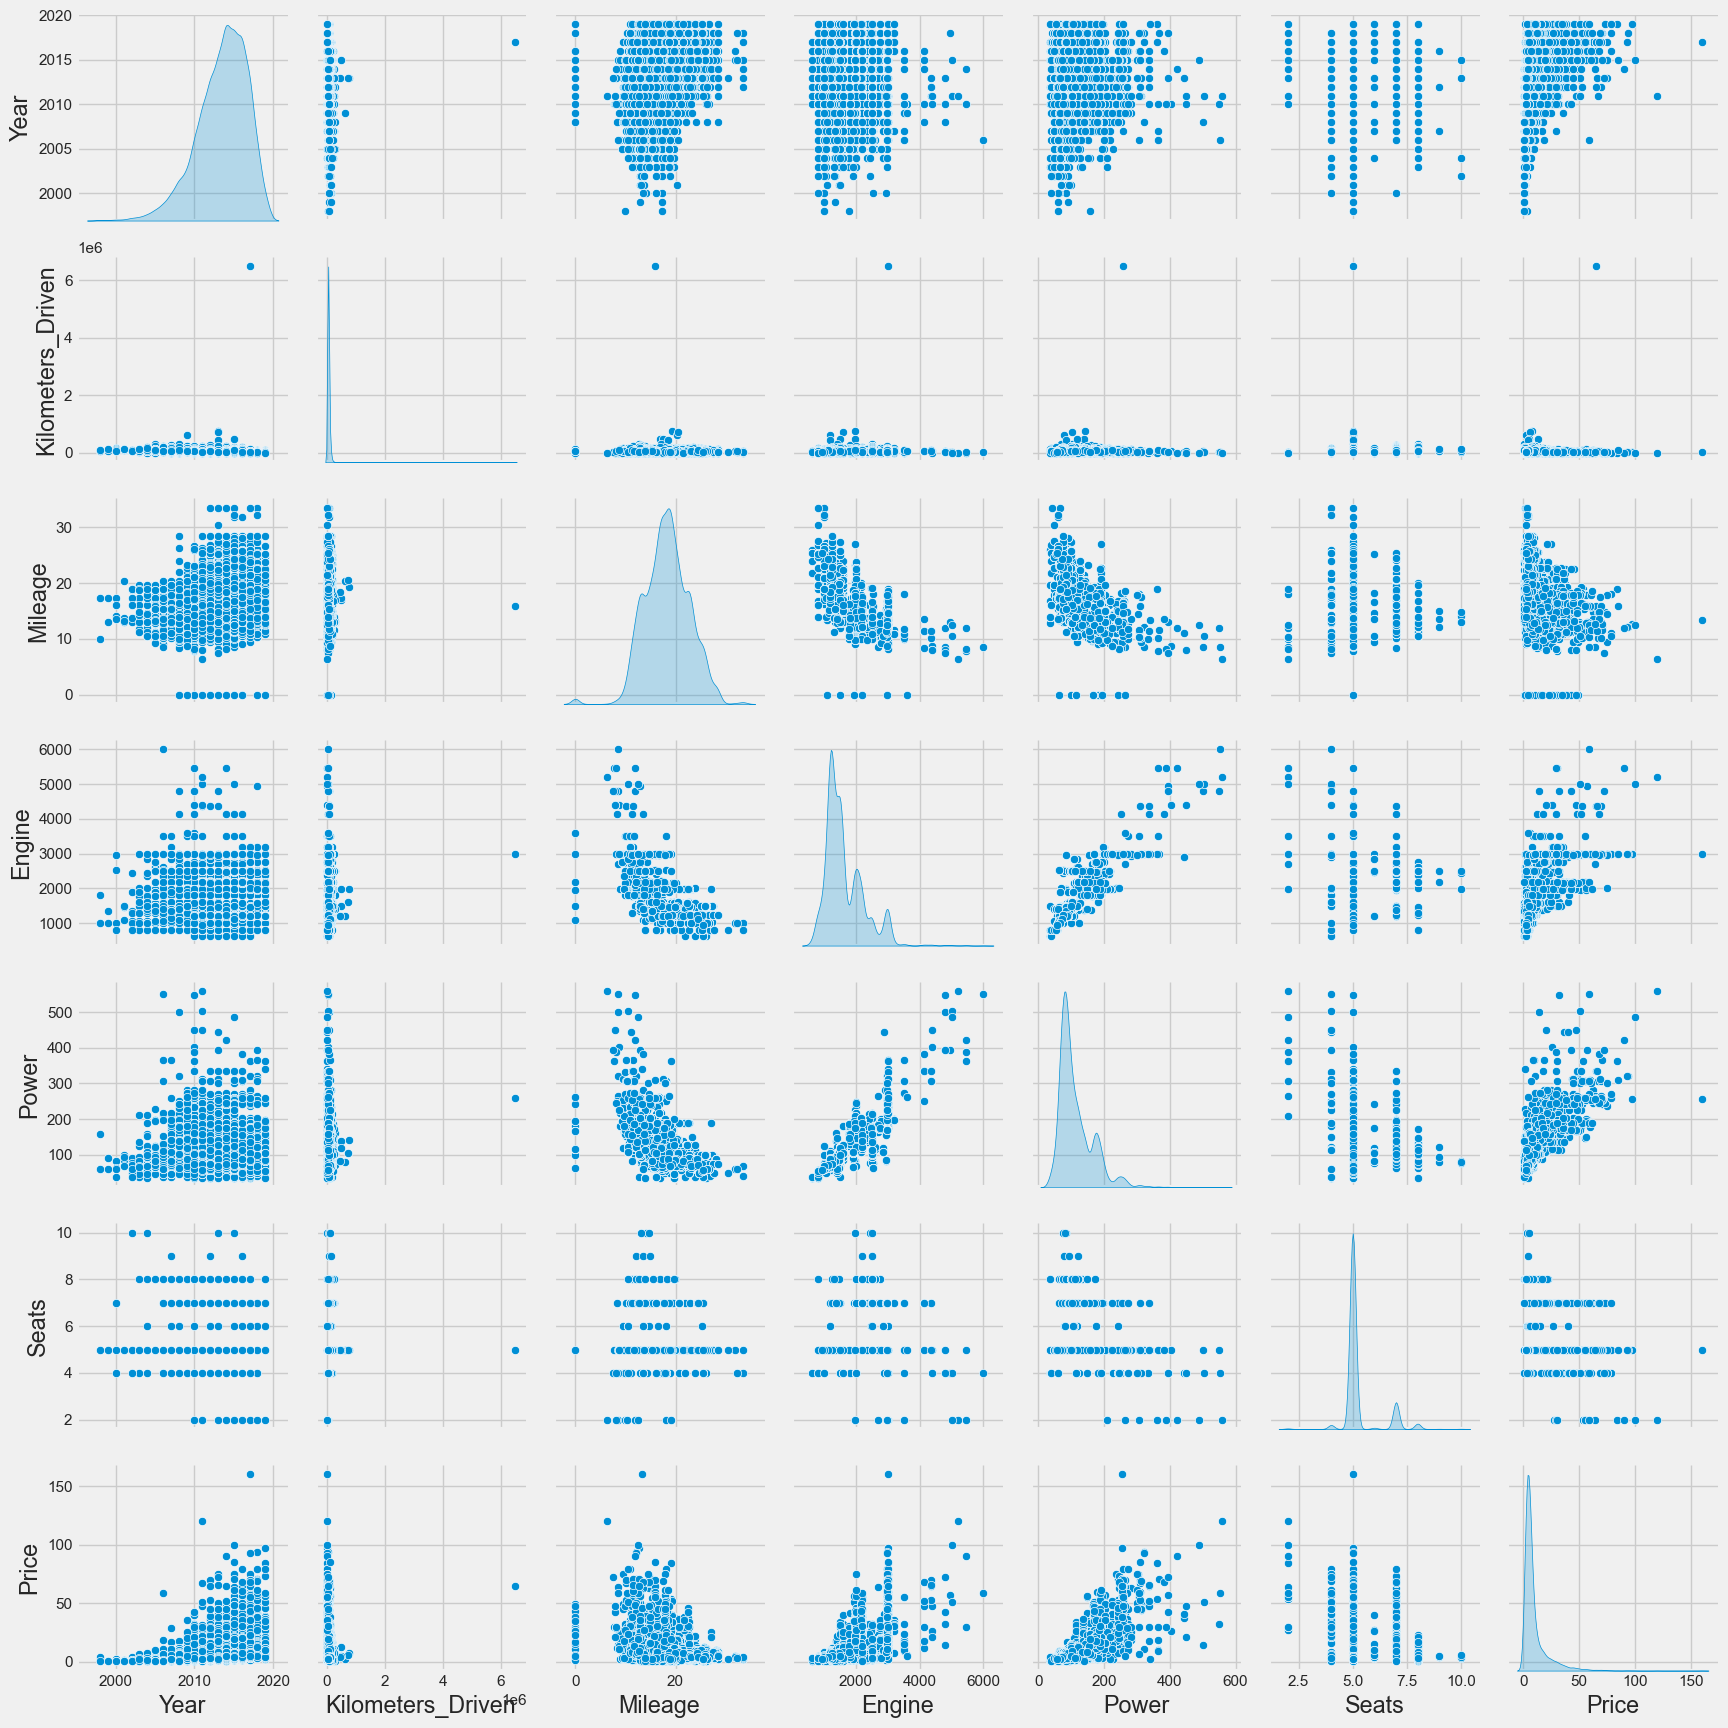

In [37]:
# Draw pairs of variables against one another
sb.pairplot(data=numericaldata, vars=numericaldata.columns, diag_kind='kde')

# Adjust layout
plt.tight_layout()
plt.show()

Specifically for Price against the other numerical variables

C:\Users\Haoren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Haoren\AppData\Local\Temp\ipykernel_12048\1933823351.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


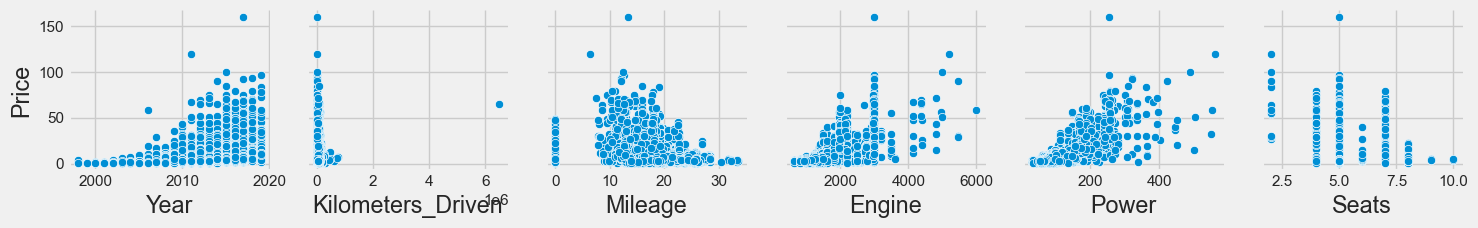

In [38]:
sb.pairplot(data=numericaldata,
                  y_vars=['Price'],
                  x_vars=["Year","Kilometers_Driven","Mileage","Engine","Power","Seats"])

# Adjust layout
plt.tight_layout()
plt.show()

# Categorical Data

Now we shall have a look at the Categorical Data

In [40]:
categoricaldata = cardata[["Fuel_Type","Transmission","Owner_Type"]]
categoricaldata

,Fuel_Type,Transmission,Owner_Type
0,CNG,Manual,First
1,Diesel,Manual,First
2,Petrol,Manual,First
3,Diesel,Manual,First
4,Diesel,Automatic,Second
...,...,...,...
5869,Diesel,Manual,First
5870,Diesel,Manual,First
5871,Diesel,Manual,Second
5872,Petrol,Manual,First


The categorical variables chosen here include all the remaining columns that were not analyzed during the numerical phase. These variables include Fuel_Type, Transmission, and Owner_Type.

Fuel_Type refers to the type of fuel that the car uses, whether it is Petrol, Diesel, Liquefied Petroleum Gas (LPG), or Compressed Natural Gas (CNG). Transmission can be either Automatic or Manual. Owner_Type indicates the number of previous owners the car had.

In our opinion, these are all factors that can affect the price point of the car.

In [13]:
categoricaldata["Fuel_Type"].value_counts()

Fuel_Type
Diesel    3153
Petrol    2656
CNG         55
LPG         10
Name: count, dtype: int64

C:\Users\Haoren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


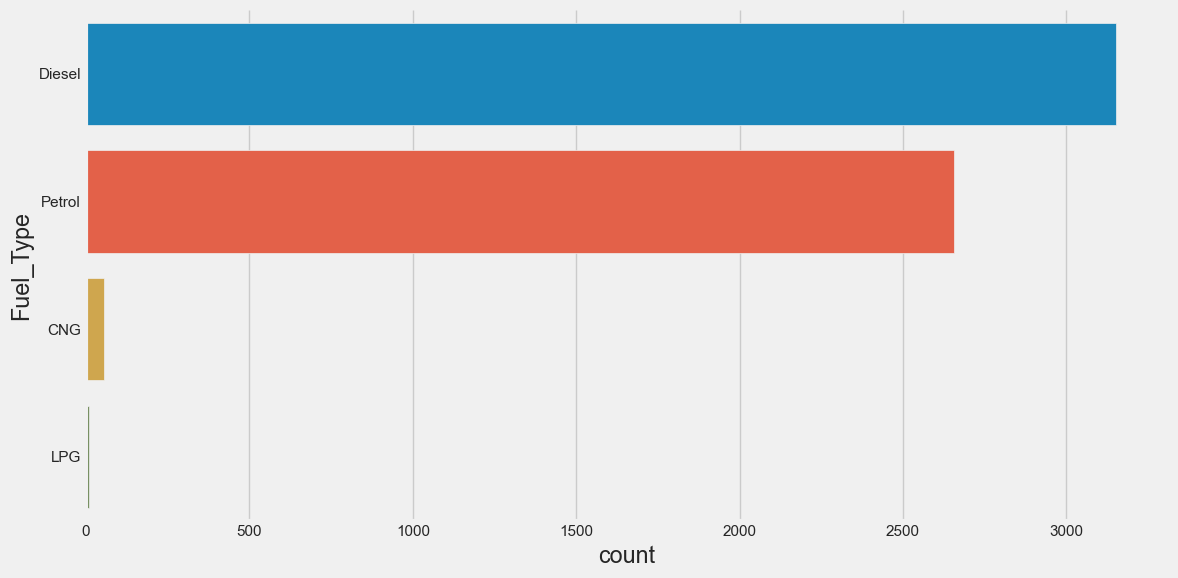

In [14]:
sb.catplot(y = "Fuel_Type", data = categoricaldata, kind = "count", order = ["Diesel","Petrol","CNG","LPG"],height=6, aspect=2)

In [15]:
categoricaldata["Transmission"].value_counts()

Transmission
Manual       4172
Automatic    1702
Name: count, dtype: int64

C:\Users\Haoren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


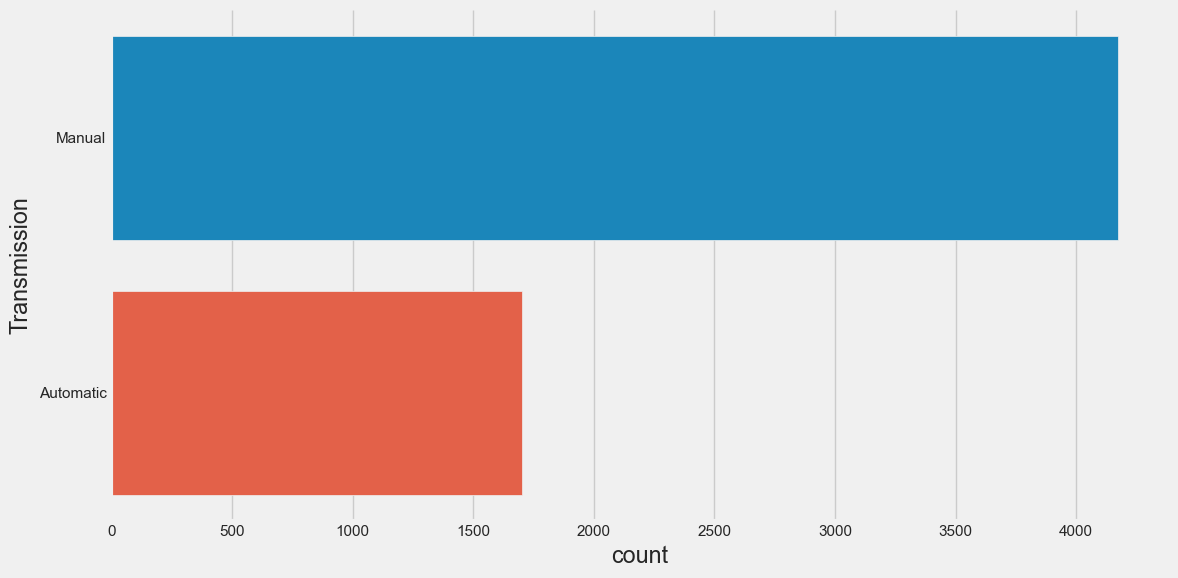

In [16]:
sb.catplot(y = "Transmission", data = categoricaldata, kind = "count", order = ["Manual","Automatic"],height=6, aspect=2)

In [17]:
categoricaldata["Owner_Type"].value_counts()

Owner_Type
First             4840
Second             926
Third              101
Fourth & Above       7
Name: count, dtype: int64

C:\Users\Haoren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


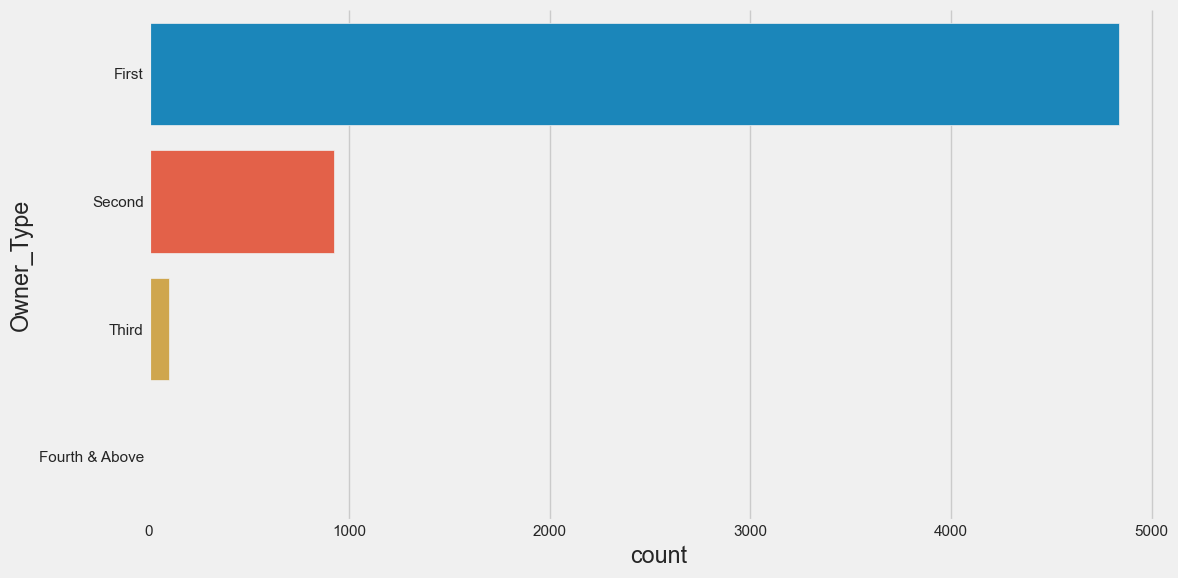

In [18]:
sb.catplot(y = "Owner_Type", data = categoricaldata, kind = "count", order = ["First","Second","Third","Fourth & Above"],height=6, aspect=2)

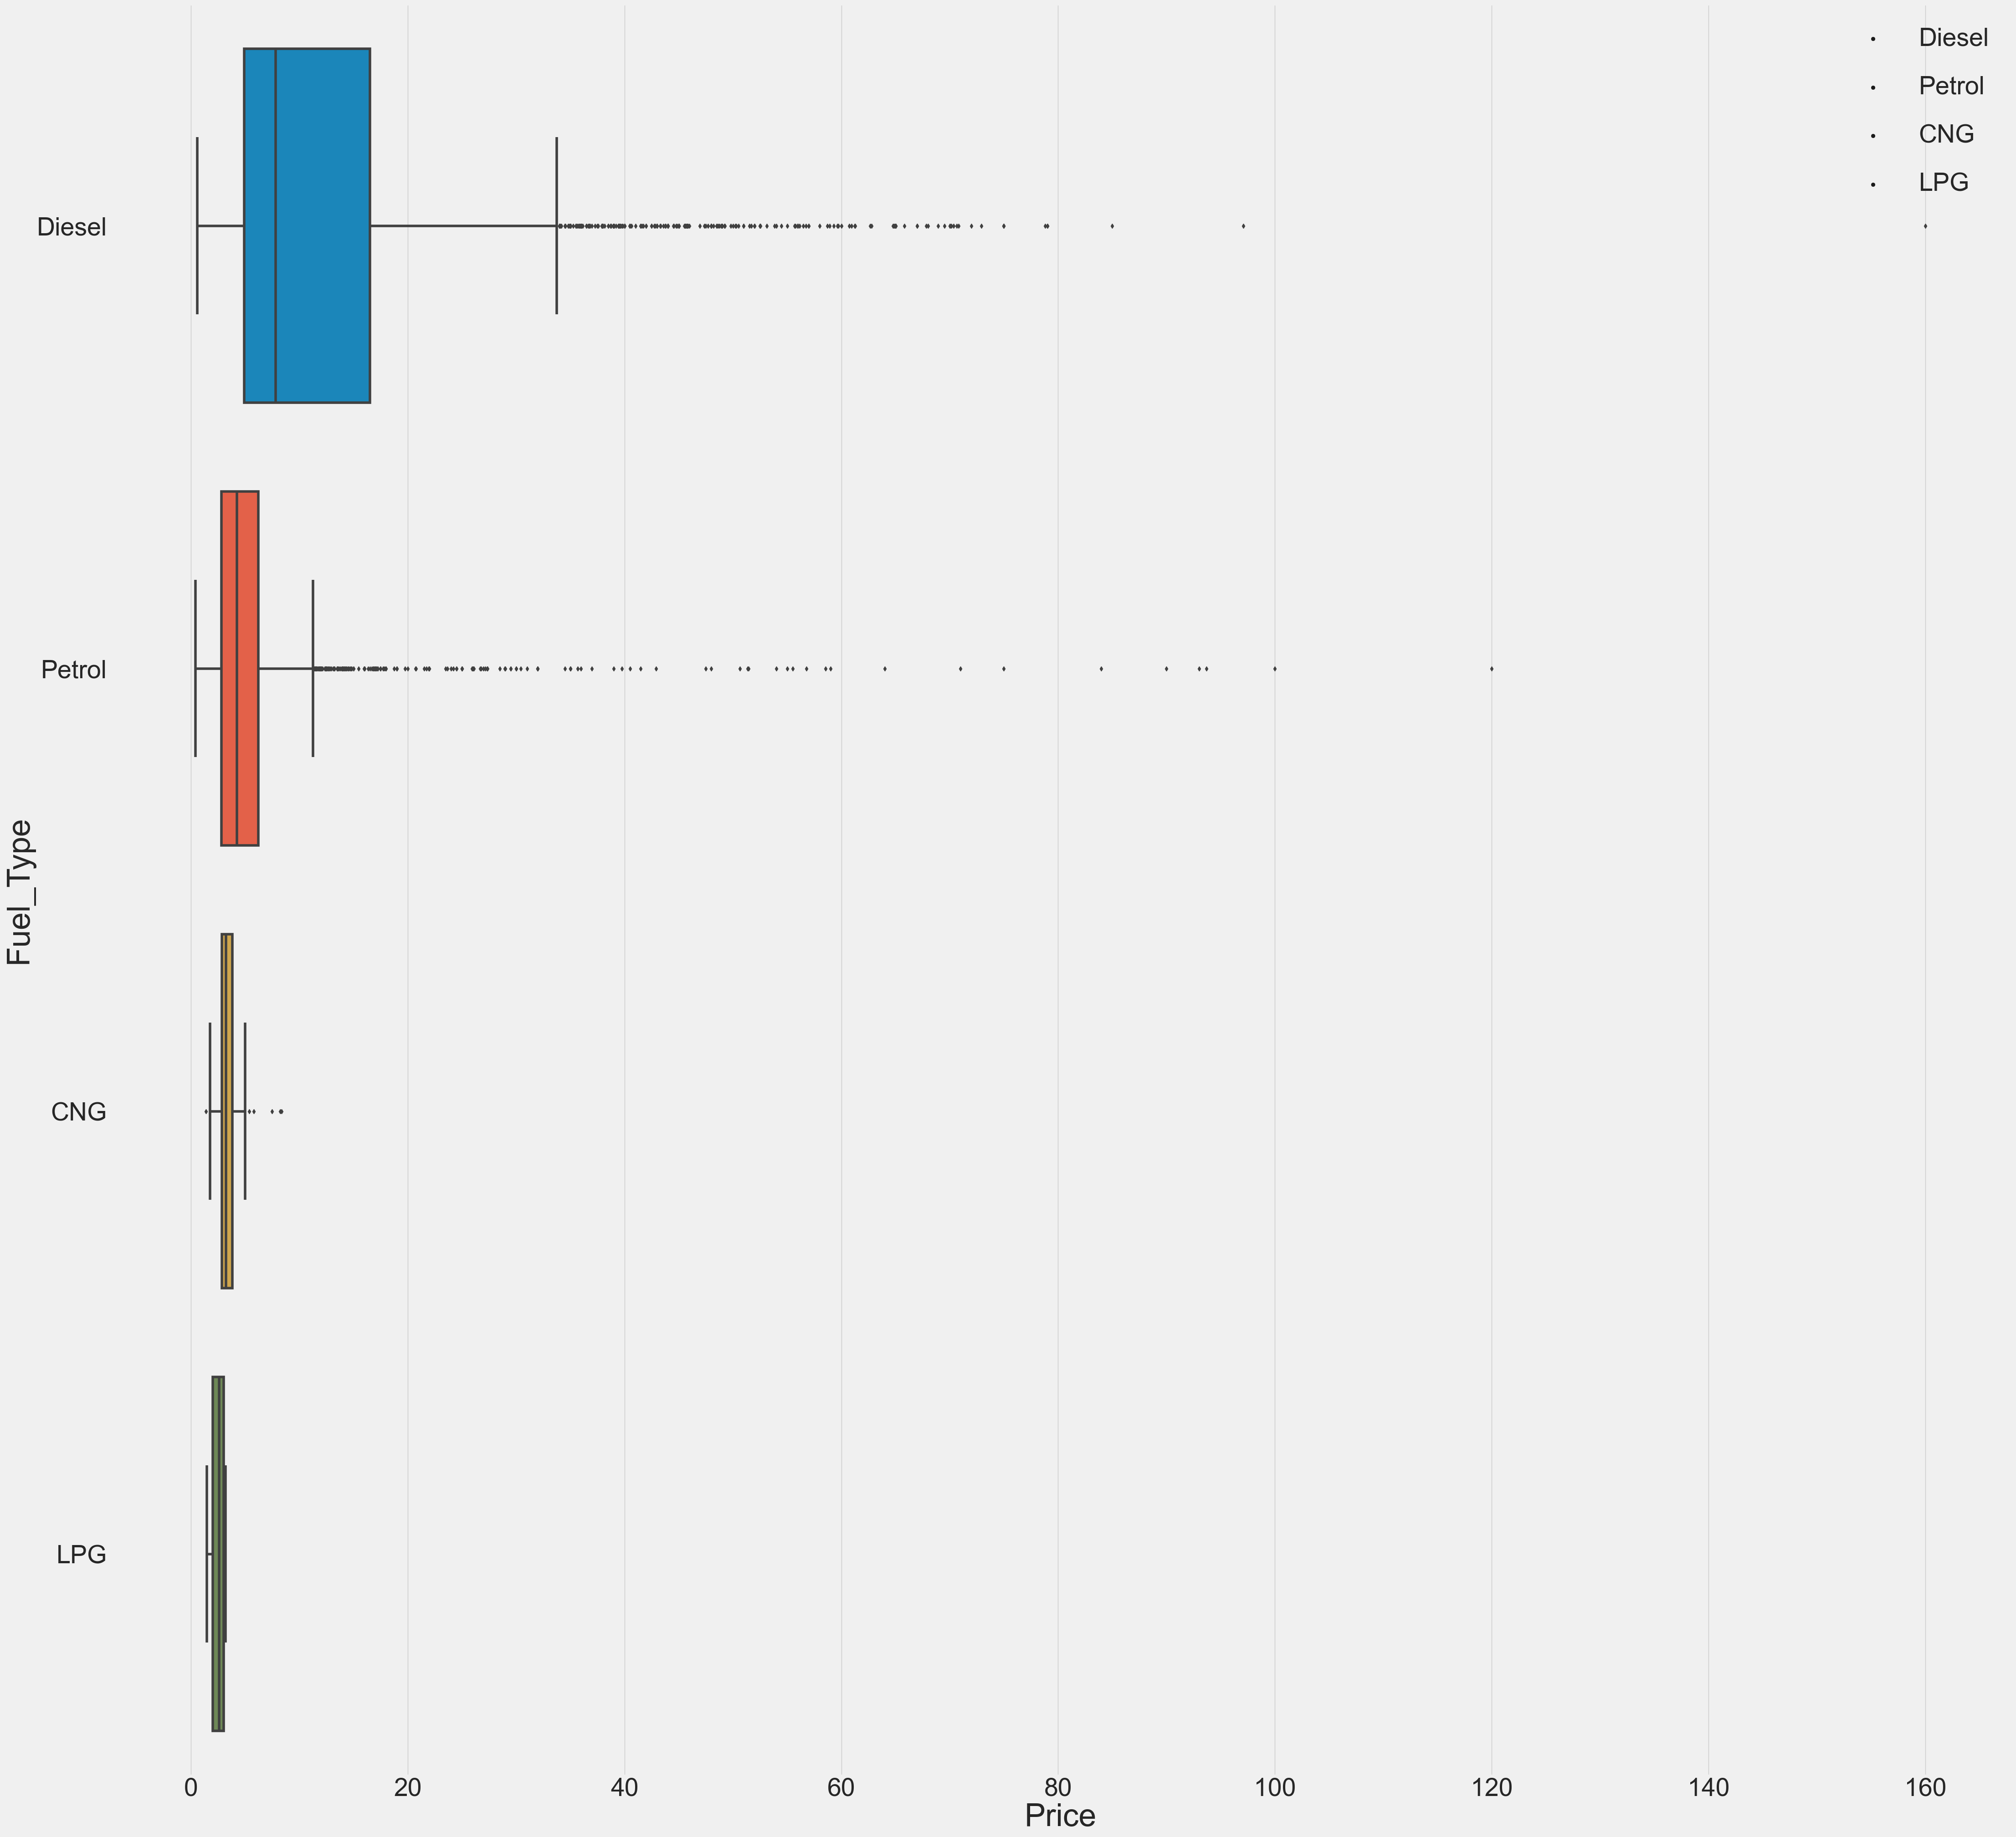

In [47]:
# Create a blank figure and axis
f, ax = plt.subplots(figsize=(48, 48))

# Create the boxplot
sb.boxplot(x="Price", y="Fuel_Type", data=cardata, orient="h", order=["Diesel","Petrol","CNG","LPG"])

# Adjust tick label sizes
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)

# Set labels
ax.set_xlabel("Price", fontsize=50)
ax.set_ylabel("Fuel_Type", fontsize=50)

# Custom legend
legend_labels = ["Diesel","Petrol","CNG","LPG"]
for i, label in enumerate(legend_labels):
    plt.scatter([], [], c='k', label=label)  # Dummy points for legend
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper right', fontsize=40)

plt.show()

It appears that Diesel-type cars generally have a higher mean price than the others, albeit with a higher standard deviation. However, it's important to note that this data may not be extremely accurate, as the count for Diesel cars is significantly higher than for the others. Additionally, the counts for CNG and LPG datasets are extremely low compared to Petrol and Diesel, which could be a factor contributing to the observed graph.

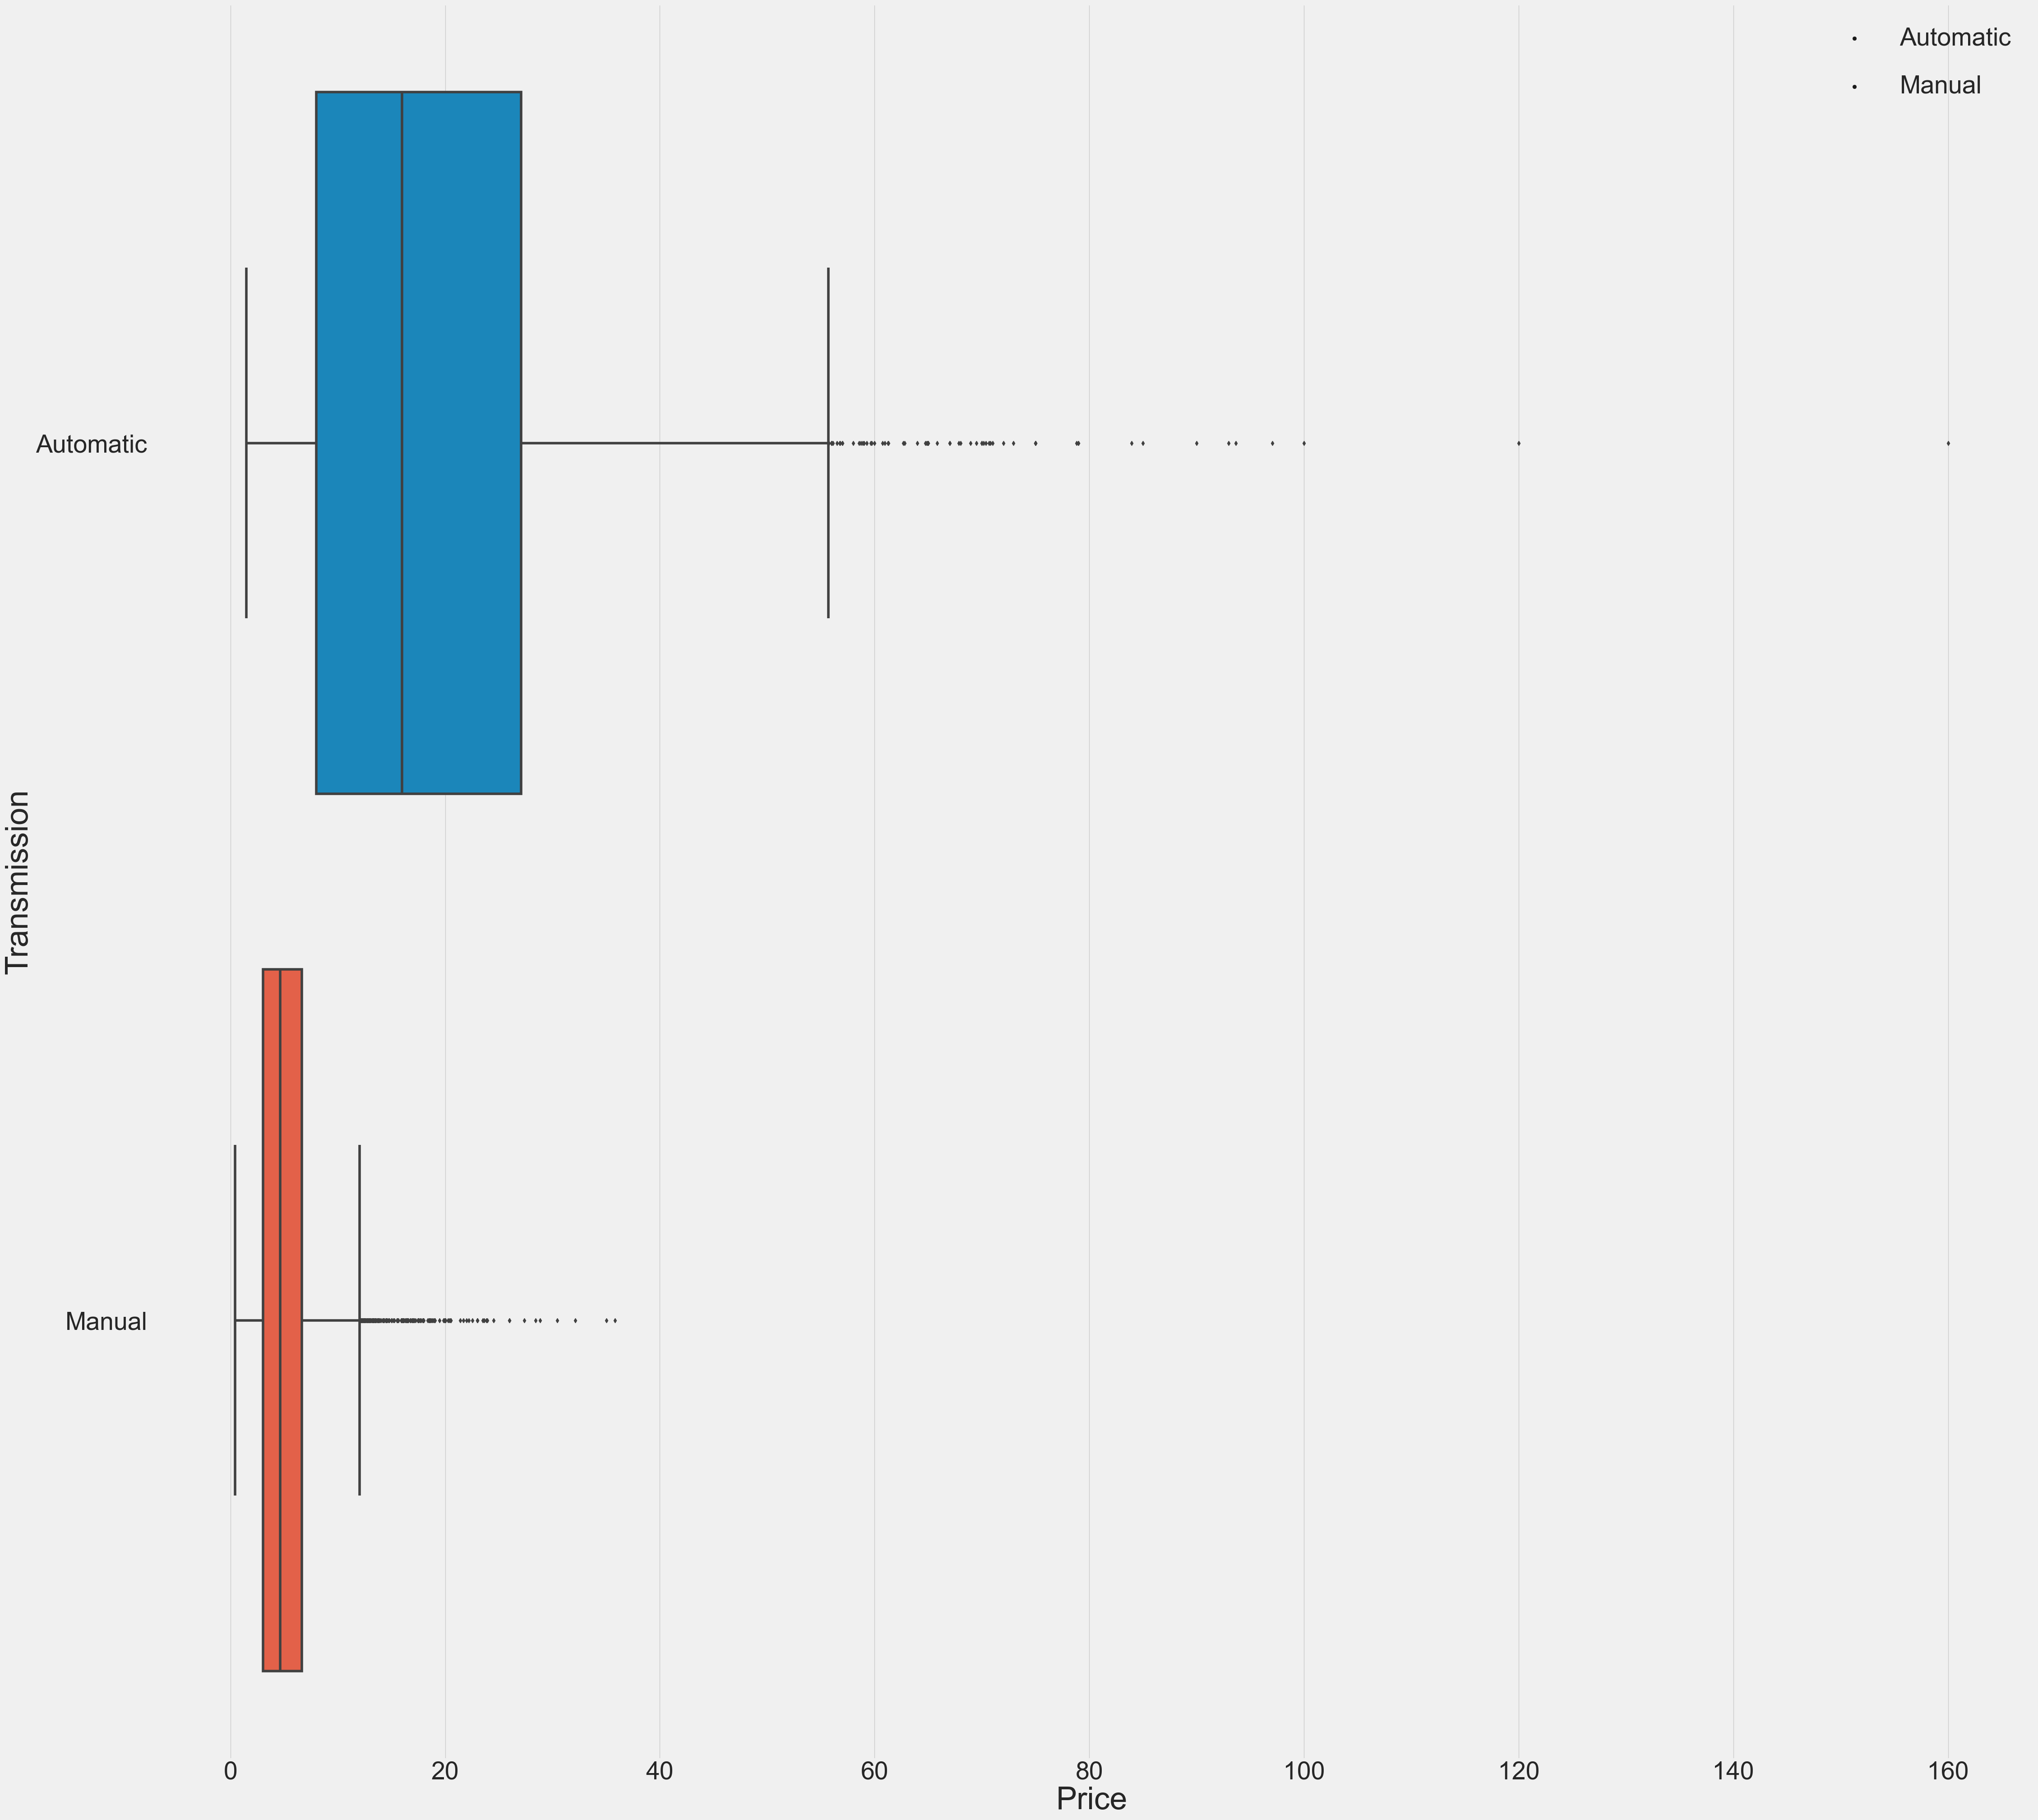

In [46]:
# Create a blank figure and axis
f, ax = plt.subplots(figsize=(48, 48))

# Create the boxplot
sb.boxplot(x="Price", y="Transmission", data=cardata, orient="h", order=["Automatic", "Manual"])

# Adjust tick label sizes
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)

# Set labels
ax.set_xlabel("Price", fontsize=50)
ax.set_ylabel("Transmission", fontsize=50)

# Custom legend
legend_labels = ["Automatic", "Manual"]
for i, label in enumerate(legend_labels):
    plt.scatter([], [], c='k', label=label)  # Dummy points for legend
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper right', fontsize=40)

plt.show()

The graph above indicates that cars with automatic transmission have a higher mean price compared to those with manual transmission. This is a relatively interesting observation, considering that the data count for manual transmission cars is significantly higher. Despite this, the mean and standard deviation of the data for automatic transmission cars are both higher and wider.

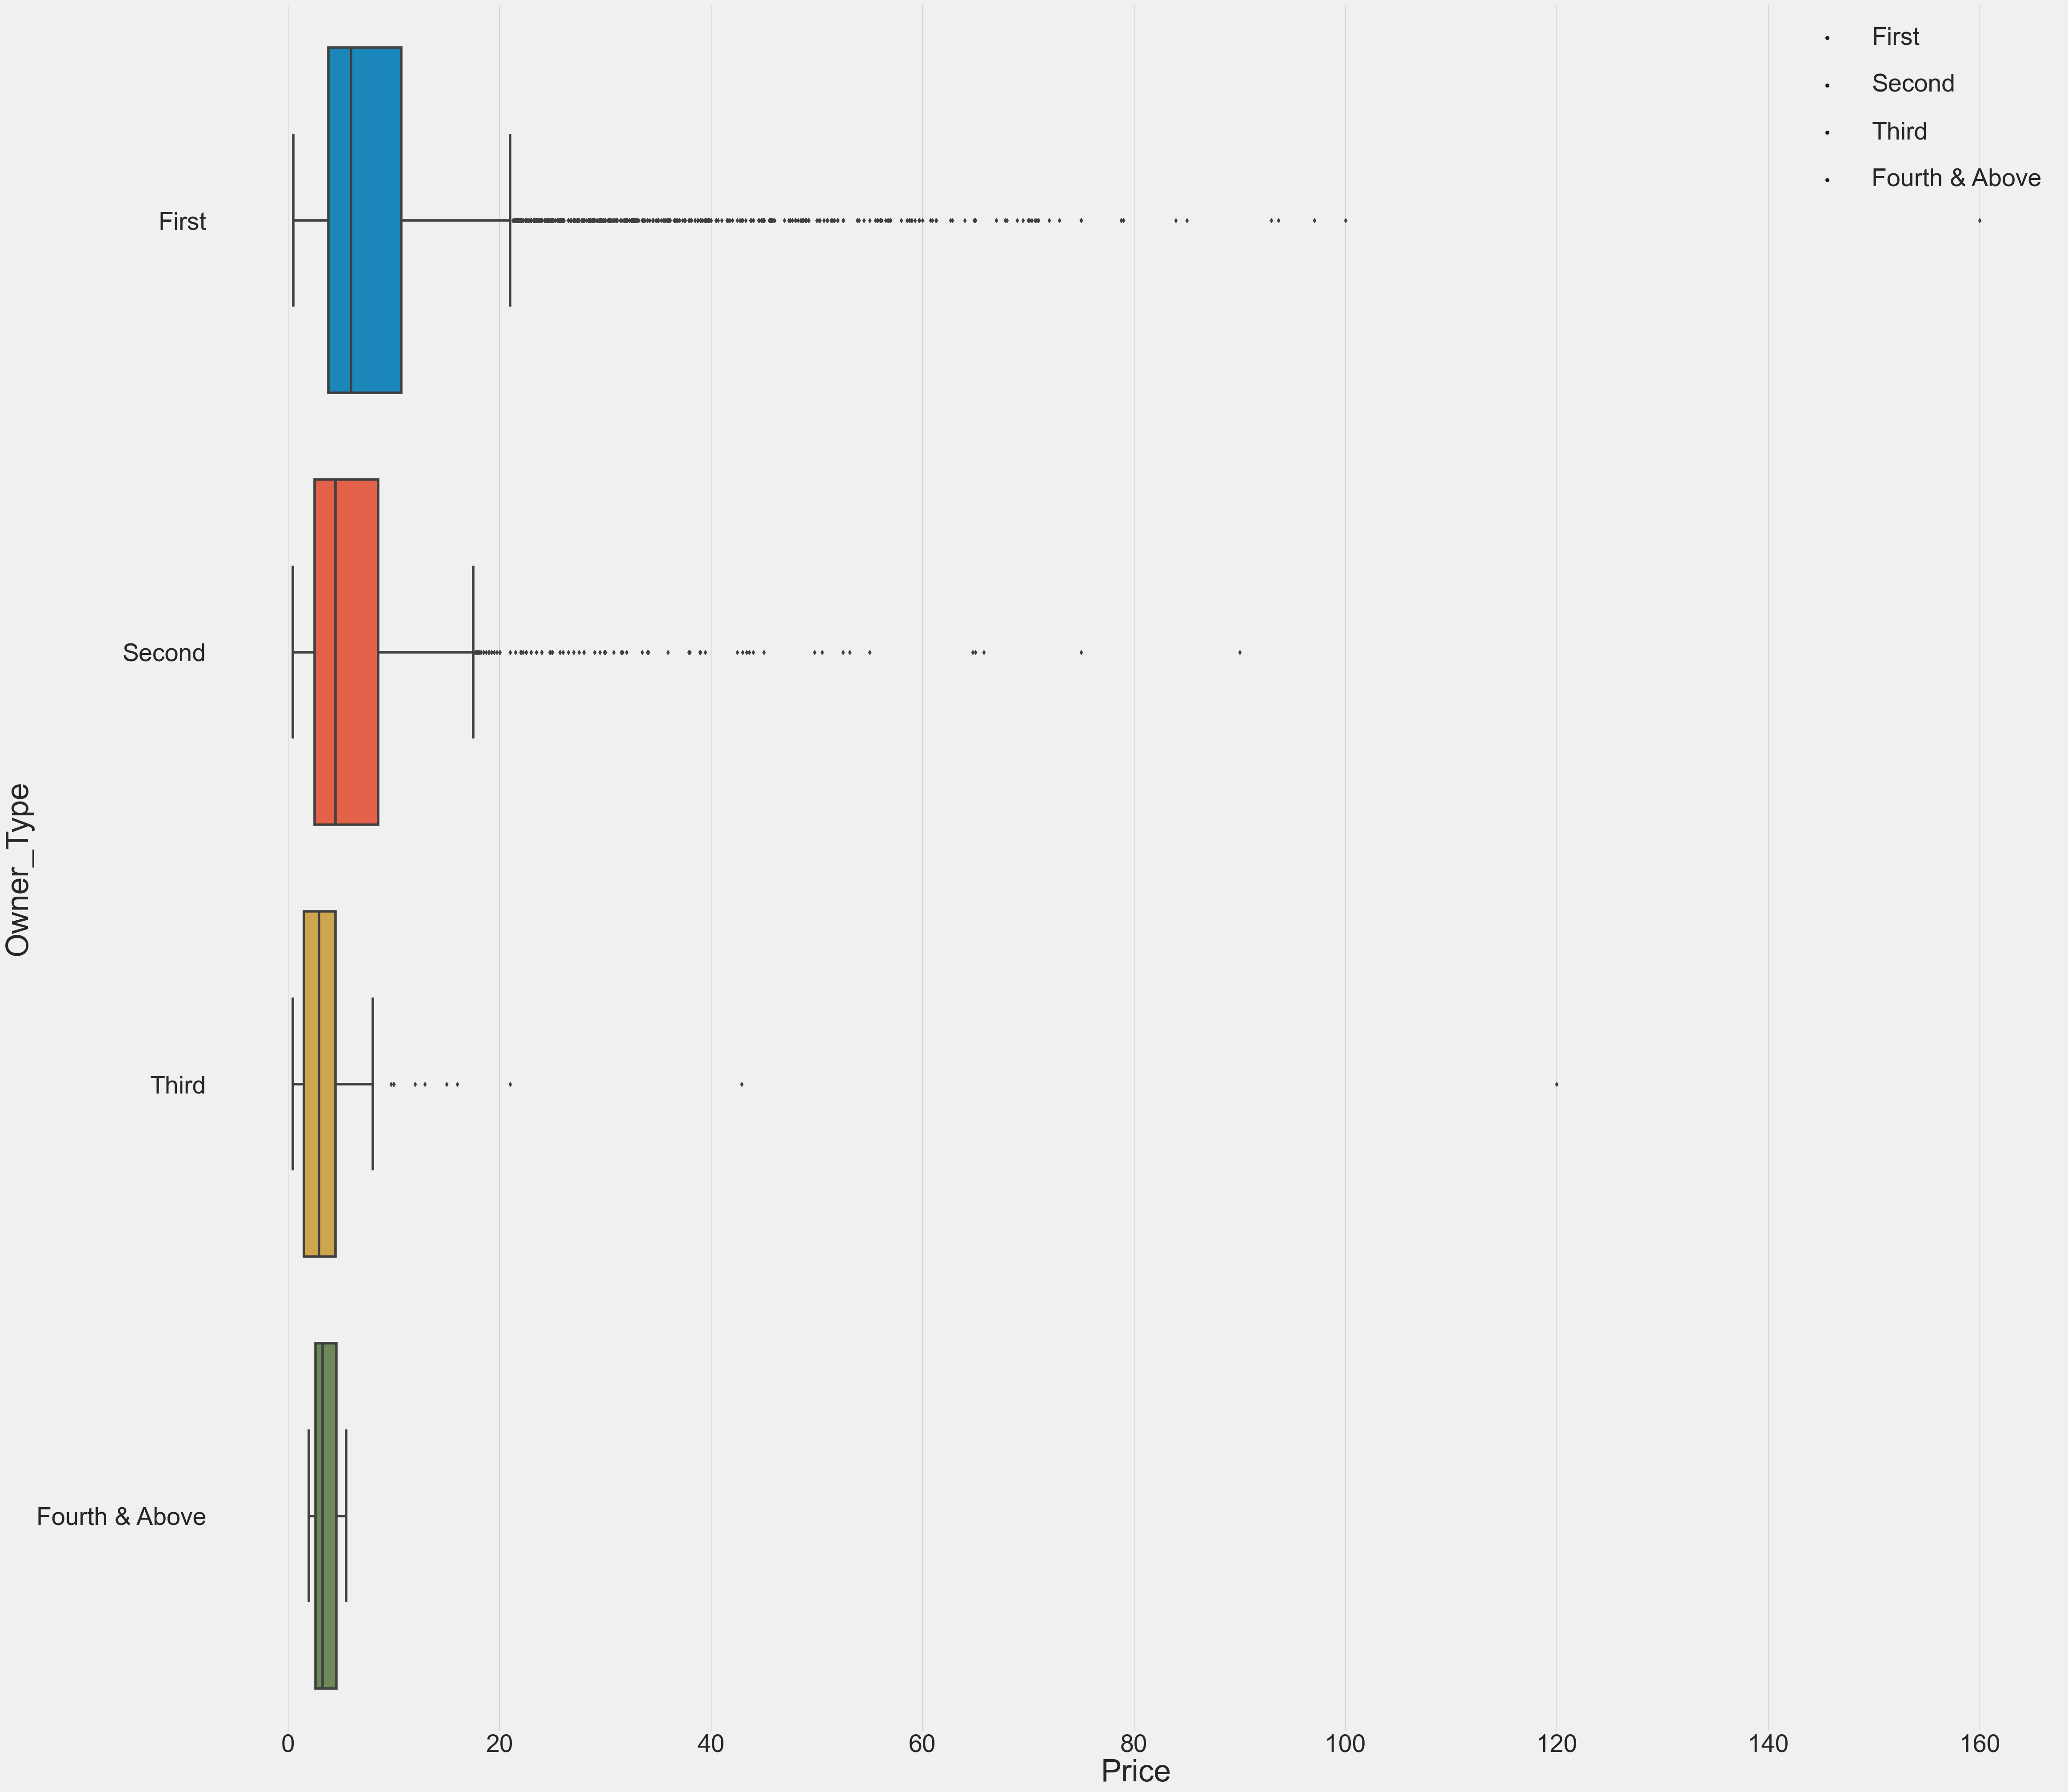

In [48]:
# Create a blank figure and axis
f, ax = plt.subplots(figsize=(48, 48))

# Create the boxplot
sb.boxplot(x="Price", y="Owner_Type", data=cardata, orient="h", order=["First","Second","Third","Fourth & Above"])

# Adjust tick label sizes
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)

# Set labels
ax.set_xlabel("Price", fontsize=50)
ax.set_ylabel("Owner_Type", fontsize=50)

# Custom legend
legend_labels = ["First","Second","Third","Fourth & Above"]
for i, label in enumerate(legend_labels):
    plt.scatter([], [], c='k', label=label)  # Dummy points for legend
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper right', fontsize=40)

plt.show()

The graph above indicates that cars owned by the first owner have a slightly higher mean price compared to those owned by the second owner, while cars owned by the third owner and beyond have a slightly lower mean price compared to those owned by the second owner.